# Unit 6 - Visualize the data
---

1. [Boxplots](#section1)
2. [Side note: Pickle](#section2)
2. [Histograms](#section3)
3. [Same stats, different graphs](#section4)



Introducing an additional library: [seaborn](https://seaborn.pydata.org/) - for statistical data visualization\
Behind the scenes, seaborn uses matplotlib to draw its plots.\
[matplotlib.pyplot](https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot) is the GUI manager of the figure. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #for reshaping graph size
import seaborn as sns  # for creating the graphs

<a id='section1'></a>

## 1. Boxplots 

What are they good for? Let's look at an example with the Titanic dataset

#### Titanic dataset

In [3]:
titanic_df = sns.load_dataset('titanic')

In [4]:
titanic_df.shape

(891, 15)

In [5]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### We would like to vizualize the passengers `age`

##### Attempt #1: With `scatterplot`

The figure size is set using matplotlib, but there are other ways. See [this](https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot) highly voted question on stackoverflow.


<AxesSubplot: >

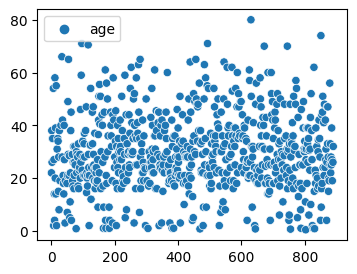

In [6]:
plt.figure(figsize=(4,3))  #figure size
sns.scatterplot(data = titanic_df[['age']])

This is the raw data:

axis x - the 891 passangers 

axis y - the age of each passenger

This is not informative

##### Attempt #2: With `lineplot`

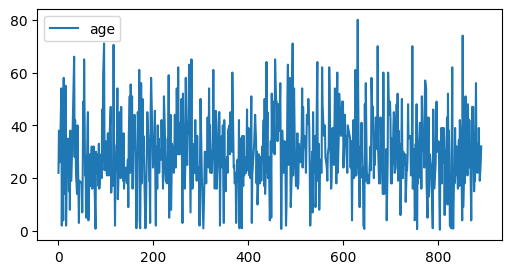

In [7]:
plt.figure(figsize=(6,3))
g = sns.lineplot(data = titanic_df[['age']])

##### Attempt #3:`boxplot`

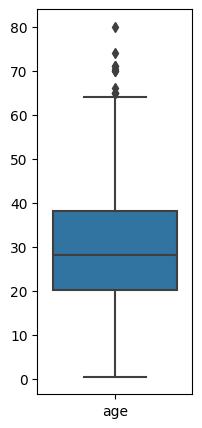

In [8]:
plt.figure(figsize=(2,5))
g = sns.boxplot(data = titanic_df[['age' ]])

We can save the figure using [savefig](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) if we want to use it later.\
`bbox_inches` - only the given portion of the figure is saved. If 'tight', create a tight box around the figure. Try removing tight and see the difference. 

In [9]:
#g.figure.savefig("boxplot_no_tight.png", bbox_inches='tight')

In [10]:
g.figure.savefig("boxplot.png", bbox_inches='tight')

<div>
<img src="https://raw.githubusercontent.com/nlihin/data-analytics/main/images/boxplot.png" width="600"/>
</div>

The data seems fine. What would we think if we had the outliers under the bottom whisker?

Data from a project in 2022. Israel vs. the world.

<div>
<img src="https://raw.githubusercontent.com/nlihin/data-analytics/main/images/graze%20%20footprints.png" width="800"/>
</div>



<a id='section2'></a>

## 2. Side note: Pickle

We want to go back to our vaccinations data. But it is getting rather tedious to read and wrangle it every time (perhaps also fill missing values):

In [14]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url) 
vacc_df = vacc_df[(vacc_df.location != "Europe") & 
                            (vacc_df.location != "High income") &
                            (vacc_df.location != "World") &
                            (vacc_df.location != "European Union") &
                            (vacc_df.location != "North America") &
                            (vacc_df.location != "Upper middle income") &
                            (vacc_df.location != "Lower middle income") &
                            (vacc_df.location != "Asia") &
                            (vacc_df.location != "South America")]

[Pickle](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_pickle.html) the file:

In [ ]:
vacc_df.to_pickle("treated_vacc")

Read the file:

In [ ]:
vacc_df = pd.read_pickle("treated_vacc")

Pickling the file allows us to save it with all of the changes we made in python. It is also supposed to be faster to read&write

### Back to boxplots:

use a groupby and look at part of the data, by location:

In [15]:
grouped_df = vacc_df.groupby('location')[['daily_vaccinations','people_fully_vaccinated_per_hundred'\
                                          ,'total_boosters_per_hundred']].max()
grouped_df = grouped_df.reset_index()
grouped_df

,location,daily_vaccinations,people_fully_vaccinated_per_hundred,total_boosters_per_hundred
0,Afghanistan,218908.0,44.05,6.39
1,Africa,4180515.0,32.48,6.86
2,Albania,17565.0,45.01,14.16
3,Algeria,256927.0,14.43,1.28
4,Andorra,1762.0,67.01,53.94
...,...,...,...,...
221,Wales,61187.0,78.14,128.22
222,Wallis and Futuna,432.0,58.67,32.48
223,Yemen,10240.0,2.39,0.20
224,Zambia,180289.0,46.03,0.17


fix the NaN's, or else the graphs will just ignore them

In [16]:
grouped_df = grouped_df.fillna(0)

In [17]:
grouped_df.head(2)

,location,daily_vaccinations,people_fully_vaccinated_per_hundred,total_boosters_per_hundred
0,Afghanistan,218908.0,44.05,6.39
1,Africa,4180515.0,32.48,6.86


#### sort the values using 'sort_values()`

In [18]:
grouped_df.sort_values('people_fully_vaccinated_per_hundred', ascending = False).head(10)

,location,daily_vaccinations,people_fully_vaccinated_per_hundred,total_boosters_per_hundred
78,Gibraltar,1068.0,126.89,150.47
203,Tokelau,62.0,116.38,51.14
164,Qatar,37344.0,105.83,70.68
213,United Arab Emirates,155312.0,103.72,54.43
161,Pitcairn,1.0,100.00,48.94
30,Brunei,7901.0,99.49,75.83
120,Macao,6788.0,92.39,69.19
181,Singapore,75745.0,90.85,78.77
89,Hong Kong,86321.0,90.82,95.19
41,Chile,298755.0,90.29,140.15


### <span style="color:blue"> Exercise:</span>
> For the data in `grouped_df`:
>
> display a scatterplot for `total_boosters_per_hundred`
>
> display a boxplot for two `total_boosters_per_hundred` and `people_fully_vaccinated_per_hundred` in the **same** boxplot

<AxesSubplot: >

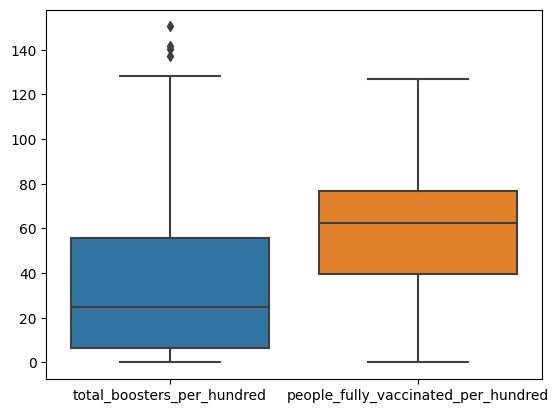

In [23]:
sns.boxplot(data = grouped_df[['total_boosters_per_hundred', 'people_fully_vaccinated_per_hundred']])

<AxesSubplot: >

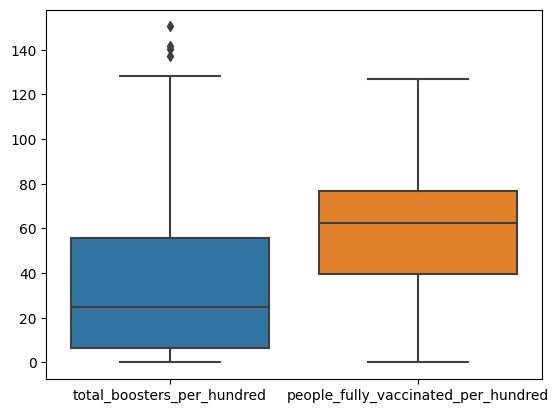

In [21]:
sns.boxplot(data = grouped_df[['total_boosters_per_hundred', 'people_fully_vaccinated_per_hundred']])

It's not perfect. Or else we would have had outliers for any number over a 100. 

<a id='section3'></a>

## 3. Histograms

Why use histograms? \
Boxplots display summary statistics, but they don't tell us much about the distribution shape. \
We use histograms to show the shape. 

In [24]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/DatasaurusDozen.tsv'
df = pd.read_csv(url, sep='\t')

In [25]:
df

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751


In [37]:
df["dataset"].unique()

array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

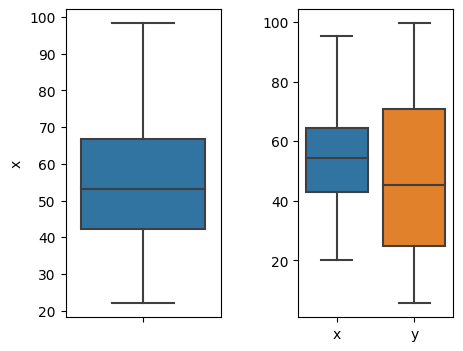

In [51]:
fig, ax = plt.subplots(1,2, figsize = (5,4))
plt.subplots_adjust(wspace = 0.5)

sns.boxplot(data = df[df.dataset == 'slant_up'],  ax = ax[1])
sns.boxplot(data = df[df.dataset == 'h_lines'], y = 'x', ax = ax[0])

plt.show()

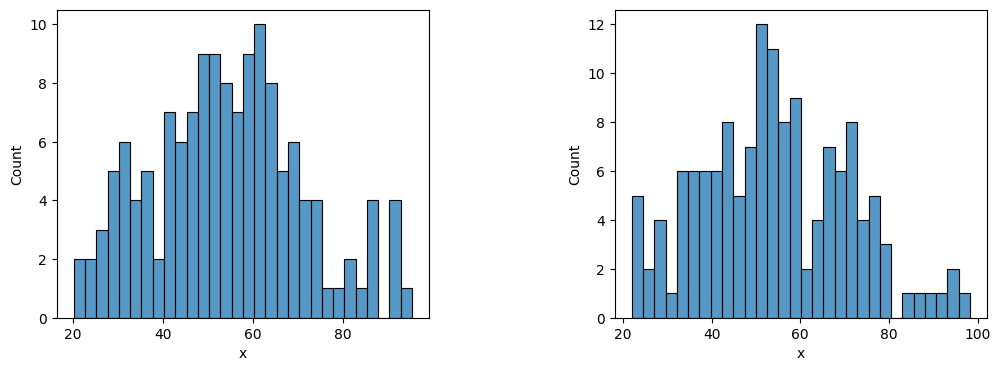

In [59]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.5)

sns.histplot(data = df[df.dataset == 'slant_up'], x = 'x', ax = ax[0],bins=30)
sns.histplot(data = df[df.dataset == 'h_lines'], x = 'x', ax = ax[1], bins=30)

plt.show()

Histograms can show the number (count), percentage, probability or density

<AxesSubplot: xlabel='age', ylabel='Density'>

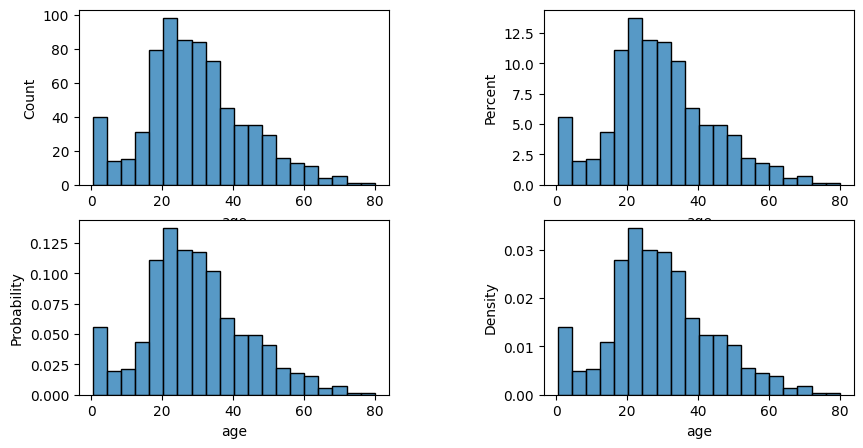

In [60]:
fig, ax = plt.subplots(2,2, figsize = (10,5))
plt.subplots_adjust(wspace = 0.5)

sns.histplot(data=titanic_df, x ='age', ax = ax[0,0] )
sns.histplot(data=titanic_df, x='age', stat='percent', ax = ax[0,1])
sns.histplot(data=titanic_df, x='age', stat='probability', ax = ax[1,0])
sns.histplot(data=titanic_df, x='age', stat='density', ax = ax[1,1])

The shape won't change as long as the number of bins doesn't change. 
Change the number of bins:

<AxesSubplot: xlabel='age', ylabel='Percent'>

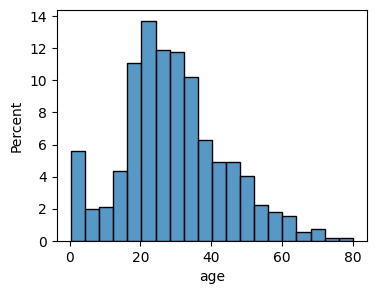

In [71]:
plt.figure(figsize=(4,3))
sns.histplot(data=titanic_df, x='age', stat='percent', bins=20)

Histograms of males and females:

<AxesSubplot: xlabel='age', ylabel='Percent'>

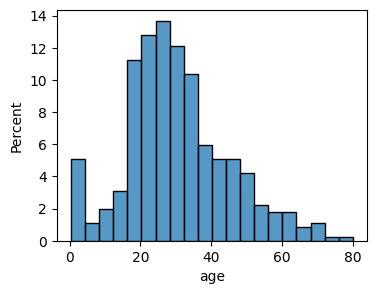

In [70]:
plt.figure(figsize=(4,3))
sns.histplot(data=titanic_df[titanic_df.sex == 'male'], x='age', stat='percent', bins=20)

---
### <span style="color:blue"> Exercise:</span>
>
>create a histogram for the age of female passangers on the titanic:
>

<AxesSubplot: xlabel='age', ylabel='Percent'>

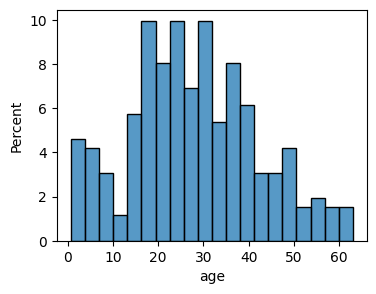

In [69]:
plt.figure(figsize=(4,3))
sns.histplot(data=titanic_df[titanic_df.sex == 'female'], x='age', stat='percent', bins=20)

---



These two histograms don't have the same number of bins

In [67]:
len(titanic_df[titanic_df.sex == 'male'])

577

In [68]:
len(titanic_df[titanic_df.sex == 'female'])

314

---
### <span style="color:blue"> Exercise:</span>
> Create two histograms, one for males and one for females, with the **same** number of bins
>

<AxesSubplot: xlabel='age', ylabel='Percent'>

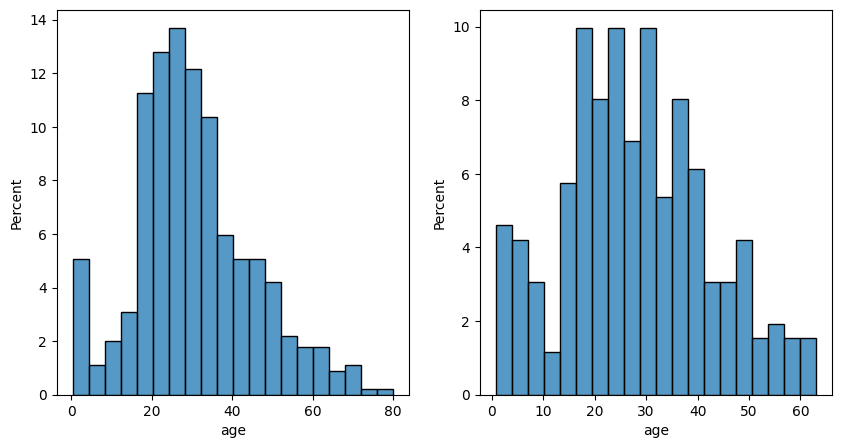

In [72]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.histplot(data=titanic_df[titanic_df.sex == 'male'], x='age', stat='percent', bins=20, ax = ax[0])
sns.histplot(data=titanic_df[titanic_df.sex == 'female'], x='age', stat='percent', bins=20, ax= ax[1])

---

Both sexs on the same graph:

In [ ]:
titanic_df.columns

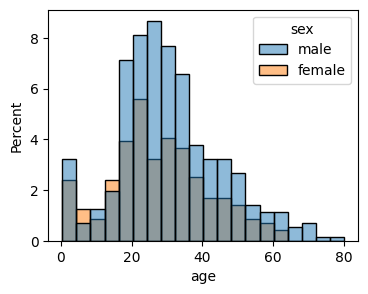

In [73]:
plt.figure(figsize=(4,3))
sns.histplot(data=titanic_df, x='age', stat='percent', hue='sex', multiple = 'layer' )
plt.show()

---
### <span style="color:blue"> Exercise:</span>
>
> try other options:
>
> `multiple{“layer”, “dodge”, “stack”, “fill”}`
>
> what is the default?
>
> create a histogram for `total_boosters_per_hundred` for our `grouped_df` dataframe


---

<a id='section4'></a>

## 4. Same stats, different graphs

In [74]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/DatasaurusDozen.tsv'

In [75]:
df = pd.read_csv(url, sep='\t')

In [76]:
df.head(15)

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333
5,dino,38.7179,84.8718
6,dino,35.6410,79.8718
7,dino,33.0769,77.5641
8,dino,28.9744,74.4872
9,dino,26.1538,71.4103


Dataset names:

In [77]:
df['dataset'].unique()

array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

Dataset statistics

In [78]:
df.groupby('dataset').agg(['count', 'mean', 'std'])

x                           y                      
           count       mean        std count       mean        std
dataset                                                           
away         142  54.266100  16.769825   142  47.834721  26.939743
bullseye     142  54.268730  16.769239   142  47.830823  26.935727
circle       142  54.267320  16.760013   142  47.837717  26.930036
dino         142  54.263273  16.765142   142  47.832253  26.935403
dots         142  54.260303  16.767735   142  47.839829  26.930192
h_lines      142  54.261442  16.765898   142  47.830252  26.939876
high_lines   142  54.268805  16.766704   142  47.835450  26.939998
slant_down   142  54.267849  16.766759   142  47.835896  26.936105
slant_up     142  54.265882  16.768853   142  47.831496  26.938608
star         142  54.267341  16.768959   142  47.839545  26.930275
v_lines      142  54.269927  16.769959   142  47.836988  26.937684
wide_lines   142  54.266916  16.770000   142  47.831602  26.937902
x_shape      142  54.260150  16.769958   142  47.839717  26.930002

What can you say about the mean, std, and number of points in each dataset?

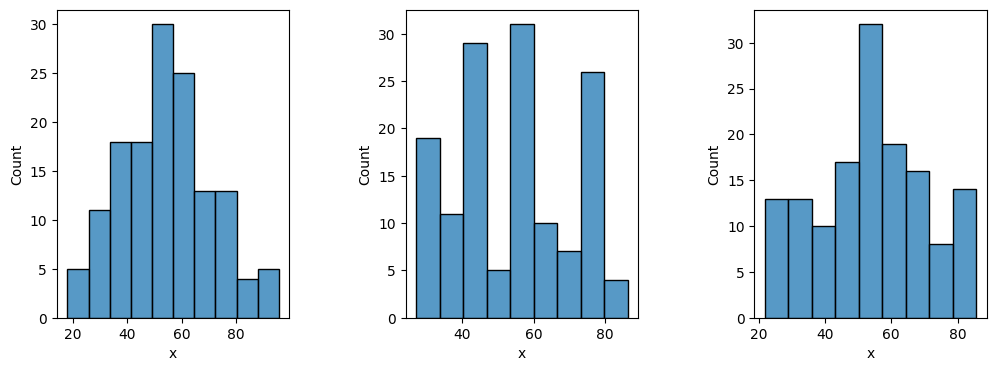

In [86]:
fig, ax = plt.subplots(1,3, figsize = (12,4))
plt.subplots_adjust(wspace = 0.5)

sns.histplot(data = df[df.dataset == 'slant_down'], x = 'x', ax = ax[0])
sns.histplot(data = df[df.dataset == 'star'], x = 'x', ax = ax[1])
sns.histplot(data = df[df.dataset == 'circle'], x = 'x', ax = ax[2])

plt.show()

---
### <span style="color:blue"> Exercise:</span>
>
> Create 3 boxplot figures for the above datasets

FacetGrid is designed to split your data in several categories and plot the same relationship with the same plotting function across all categories for easy comparison

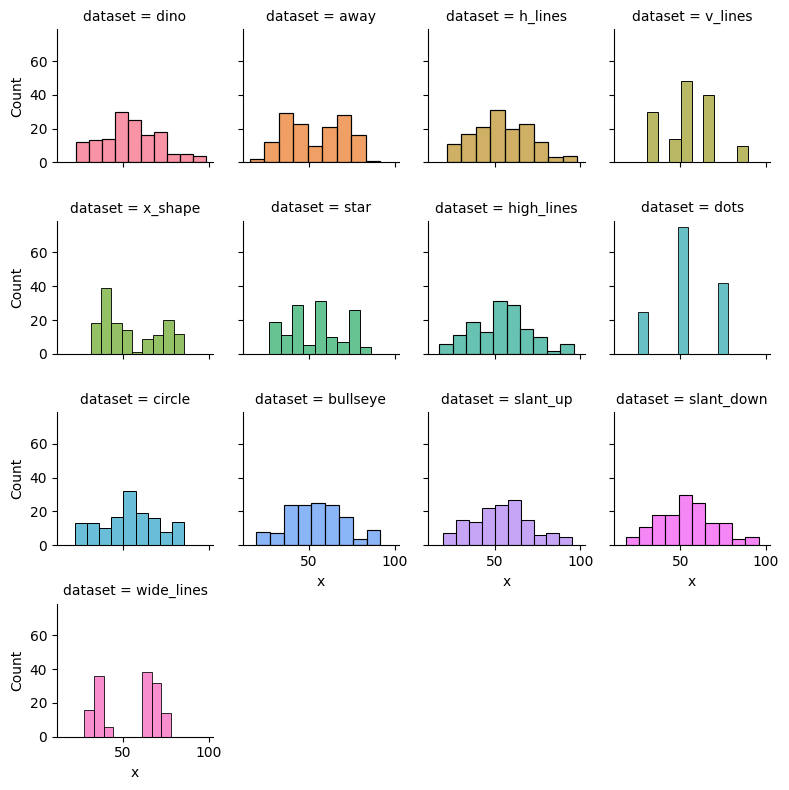

In [88]:
grid_histplots = sns.FacetGrid(df, col="dataset", hue="dataset", col_wrap=4, height = 2)
grid_histplots.map_dataframe(sns.histplot, x = 'x')
plt.show()

In [87]:
df.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


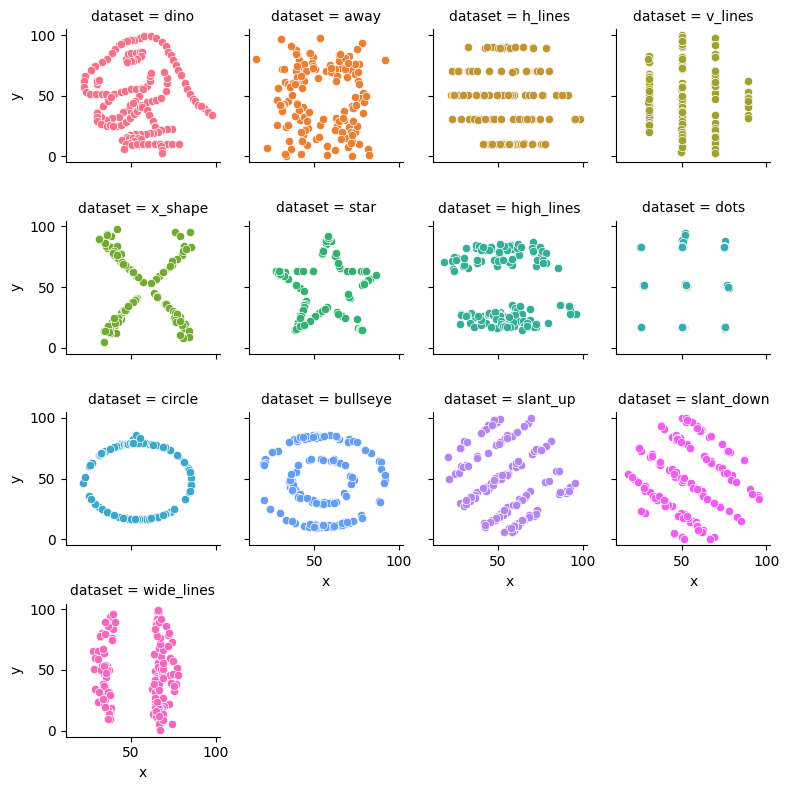

In [90]:
grid_scatterplots = sns.FacetGrid(df, col="dataset", hue="dataset", col_wrap=4, height =2)
grid_scatterplots.map_dataframe(sns.scatterplot, x="x", y="y")

---
>### Functions covered in this unit:
>
> `scatterplot` - (x,y) points on the graphs
>
> `lineplot` - simple lineplot
>
> `plt.figure(fixsize(m,n))` - set the size of the graph\figure to (m,n)
>
> `boxplot` - create a boxplot
>
> `reset_index` - reset index to a numerical index beginning at 0
>
> `sort_values()` - sorts values 
>
> `histplot` - create a histogram
>
> `std()` - standard deviation
>
> `to_pickle`, `read_pickle` - serialize dataframe to file, read from file
---